In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

# from sklearn.decomposition import PCA

In [3]:
data_path = "corrtestdata.csv"
original_data = data = pd.read_csv(data_path)
data

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,4,0.000000,0.001864,1,2,0.714286,10.5,1,5,0.454545,0.000000,0.199546
1,rat2,251,182.0,1,0.010440,0.004396,0.008791,4,0.023077,0.000742,3,2,0.666667,19.5,3,3,0.302198,1.648659,0.478632
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,4,0.000000,0.001467,2,1,0.904762,10.5,2,8,0.653333,0.000000,0.340136
3,rat4,261,45.0,2,0.047333,0.005556,0.105111,-1,0.293333,0.002178,1,1,0.869565,11.5,4,2,0.260000,2.653242,0.340265
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,4,0.000000,0.001884,1,1,0.720000,12.5,2,8,0.500000,0.000000,0.275200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,1,0.004087,0.001337,1,1,0.760870,23.0,2,7,0.469952,0.993252,0.786389
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,2,0.007437,0.001592,1,1,0.714286,24.5,2,8,0.380252,1.512927,0.793003
560,rat578,230,459.0,1,0.085251,0.003682,0.016144,2,0.001089,0.001218,1,1,0.816327,24.5,2,8,0.517429,0.405465,0.764681
561,rat120,166,253.0,2,0.035178,3.968379,0.005138,-1,0.013043,0.000794,4,2,0.727273,22.0,3,3,0.189723,1.458615,0.522727


In [4]:
def check_strong(x):
    if np.abs(x)>0.4:
        return x
    else:
        return ""

def get_correlation(data):
    p_corr=data.corr(method='pearson')
    p_corr=p_corr.round(2)
    p_corr
    corr_strong=p_corr.applymap(check_strong)
    return corr_strong
    

In [5]:
corr1=get_correlation(data)
corr1

,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
day,1,,,,,,,,,,0.45,,,0.7,,,0.44,
weight,,1,,,,,,,,,,,0.88,,,-0.41,0.53,0.88
gender,,,1,,,,-0.89,,,,,,,,,,,
liverind,,,,1,,,,,,,,,,,,,,
heartind,,,,,1,,,,,,,,,,,,,
appind,,,,,,1,,0.43,,,,,,,,,,
femstate,,,-0.89,,,,1,,,,,,,,,,,
gonfatind,,,,,,0.43,,1,,,0.49,,,0.57,,,0.68,
batind,,,,,,,,,1,,,,,,,,,
sulcer,,,,,,,,,,1,,,,,,,,


# Task 1
a) strong correlations are in the table above

In [6]:
to_drop=data.loc[(data["id"]=="rat2")|(data["id"]=="rat53")|(data["id"]=="rat120")|(data["id"]=="rat434")].index
data.loc[to_drop]

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
1,rat2,251,182.0,1,0.010440,0.004396,0.008791,4,0.023077,0.000742,3,2,0.666667,19.5,3,3,0.302198,1.648659,0.478632
48,rat53,81,104.4,1,0.061303,0.015326,0.009579,4,0.000000,0.002835,2,2,0.666667,15.0,1,5,0.493295,0.000000,0.464000
561,rat120,166,253.0,2,0.035178,3.968379,0.005138,-1,0.013043,0.000794,4,2,0.727273,22.0,3,3,0.189723,1.458615,0.522727
562,rat434,258,55.0,1,0.309273,0.016364,0.075636,4,0.004545,0.003236,1,1,0.829268,20.5,2,8,0.214545,0.223144,0.130874


In [23]:
# remove the outliers
data_task2 = data.drop(to_drop)
data_task2

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,4,0.000000,0.001864,1,2,0.714286,10.5,1,5,0.454545,0.000000,0.199546
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,4,0.000000,0.001467,2,1,0.904762,10.5,2,8,0.653333,0.000000,0.340136
3,rat4,261,45.0,2,0.047333,0.005556,0.105111,-1,0.293333,0.002178,1,1,0.869565,11.5,4,2,0.260000,2.653242,0.340265
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,4,0.000000,0.001884,1,1,0.720000,12.5,2,8,0.500000,0.000000,0.275200
5,rat6,169,40.0,1,0.057250,0.006500,0.014000,4,0.000000,0.002925,2,1,0.826087,11.5,2,7,0.575000,0.000000,0.302457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,rat574,127,442.0,1,0.067738,0.003507,0.013552,3,0.010656,0.002602,1,1,0.808163,24.5,2,7,0.372172,1.742219,0.736360
557,rat575,269,381.8,1,0.078575,0.003667,0.014667,4,0.004976,0.001035,1,1,0.777273,22.0,2,6,0.381090,1.064711,0.788843
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,1,0.004087,0.001337,1,1,0.760870,23.0,2,7,0.469952,0.993252,0.786389
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,2,0.007437,0.001592,1,1,0.714286,24.5,2,8,0.380252,1.512927,0.793003


In [8]:
corr2=get_correlation(data_dropb)
corr2

,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
day,1,,,,-0.45,,,,,,0.45,,,0.7,,,0.44,
weight,,1,,,-0.49,,,,,,,,0.88,,,-0.42,0.53,0.88
gender,,,1,,,,-0.89,,,,,,,,,,,
liverind,,,,1,,,,,,,,,,,,0.46,-0.48,
heartind,-0.45,-0.49,,,1,,,,,,,,-0.42,-0.47,-0.41,,-0.55,-0.55
appind,,,,,,1,,0.47,,,,,,,,,,
femstate,,,-0.89,,,,1,,,,,,,,,,,
gonfatind,,,,,,0.47,,1,,,0.49,,,0.57,,,0.68,
batind,,,,,,,,,1,,,,,,,,,
sulcer,,,,,,,,,,1,,,,,,,,


## b) after removing outliers, there is a strong correlation between liveind and ADWBind. the data we deleted influenced the computation of correlation, because some of their number in liverind or heartind are apprantly unreasonable. they either took up too much or too litter percent of whole body weights, which is impossible  

In [9]:
freezer_index=data_dropb.loc[data_dropb["day"]==400].index


In [10]:
data_dropb.loc[freezer_index,"day"]=0
data_dropb.loc[freezer_index,"year"]=-1

In [11]:
corr3=get_correlation(data_dropb)
corr3

,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
day,1,,,,,,,,,,-0.53,,,,,,,
weight,,1,,,-0.49,,,,,,,,0.88,,,-0.42,0.53,0.88
gender,,,1,,,,-0.89,,,,,,,,,,,
liverind,,,,1,,,,,,,,,,,,0.46,-0.48,
heartind,,-0.49,,,1,,,,,,,,-0.42,-0.47,,,-0.55,-0.55
appind,,,,,,1,,0.47,,,,,,,,,,
femstate,,,-0.89,,,,1,,,,,,,,,,,
gonfatind,,,,,,0.47,,1,,,0.49,,,0.57,-0.45,,0.68,
batind,,,,,,,,,1,,,,,,,,,
sulcer,,,,,,,,,,1,,,,,,,,


## c) the correlation of day and years with other features are all vanished.  I think day and year don't have the correlations with other featurs, these time related feature can't maintian obvious connection between the actual physiological characteristics.

In [12]:
data_dropb=data_dropb.drop(freezer_index)

corr4=get_correlation(data_dropb)
corr4

,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
day,1,,,,,,,,,,,,,0.52,,,,
weight,,1,,,-0.44,,,,,,,,0.89,,,,0.49,0.87
gender,,,1,,,,-0.89,,,,,,,,,,,
liverind,,,,1,,,,,,,,,,,,,,
heartind,,-0.44,,,1,,,,,,,,-0.42,,,,,-0.47
appind,,,,,,1,,0.48,,,,,,,,,,
femstate,,,-0.89,,,,1,,,,,,,,,,,
gonfatind,,,,,,0.48,,1,,,,,,,,,0.51,
batind,,,,,,,,,1,,,,,,,,,
sulcer,,,,,,,,,,1,,,,,,,,


# e) changing some categorical features
# f) which features are realiable?

In [23]:
data_dropb["femstate"]=data_dropb["femstate"]+10
data_dropb["place"]=data_dropb["place"]+5

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,14,0.000000,0.001864,1,2,0.714286,10.5,31,5,0.454545,0.000000,0.199546
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,14,0.000000,0.001467,2,1,0.904762,10.5,32,8,0.653333,0.000000,0.340136
3,rat4,261,45.0,2,0.047333,0.005556,0.105111,9,0.293333,0.002178,1,1,0.869565,11.5,34,2,0.260000,2.653242,0.340265
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,14,0.000000,0.001884,1,1,0.720000,12.5,32,8,0.500000,0.000000,0.275200
5,rat6,169,40.0,1,0.057250,0.006500,0.014000,14,0.000000,0.002925,2,1,0.826087,11.5,32,7,0.575000,0.000000,0.302457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,rat574,127,442.0,1,0.067738,0.003507,0.013552,13,0.010656,0.002602,1,1,0.808163,24.5,32,7,0.372172,1.742219,0.736360
557,rat575,269,381.8,1,0.078575,0.003667,0.014667,14,0.004976,0.001035,1,1,0.777273,22.0,32,6,0.381090,1.064711,0.788843
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,11,0.004087,0.001337,1,1,0.760870,23.0,32,7,0.469952,0.993252,0.786389
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,12,0.007437,0.001592,1,1,0.714286,24.5,32,8,0.380252,1.512927,0.793003


In [24]:
corr4=get_correlation(data_dropb)
corr4

,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
day,1,,,,,,,,,,,,,0.52,,,,
weight,,1,,,-0.44,,,,,,,,0.89,,,,0.49,0.87
gender,,,1,,,,-0.89,,,,,,,,,,,
liverind,,,,1,,,,,,,,,,,,,,
heartind,,-0.44,,,1,,,,,,,,-0.42,,,,,-0.47
appind,,,,,,1,,0.48,,,,,,,,,,
femstate,,,-0.89,,,,1,,,,,,,,,,,
gonfatind,,,,,,0.48,,1,,,,,,,,,0.51,
batind,,,,,,,,,1,,,,,,,,,
sulcer,,,,,,,,,,1,,,,,,,,


# Choose BMI weight Blength to plot

<AxesSubplot:xlabel='weight', ylabel='blength'>

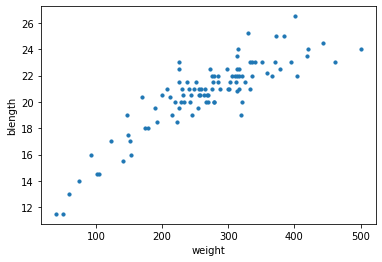

In [17]:
data_dropb.sample(n=100, random_state=1).plot.scatter(x = 'weight', y = 'blength', s = 10)

<AxesSubplot:xlabel='weight', ylabel='BMI'>

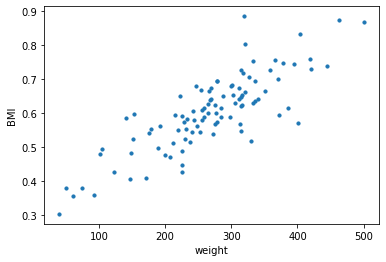

In [18]:
data_dropb.sample(n=100, random_state=1).plot.scatter(x = 'weight', y = 'BMI', s = 10)

In [24]:
data_task2

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,4,0.000000,0.001864,1,2,0.714286,10.5,1,5,0.454545,0.000000,0.199546
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,4,0.000000,0.001467,2,1,0.904762,10.5,2,8,0.653333,0.000000,0.340136
3,rat4,261,45.0,2,0.047333,0.005556,0.105111,-1,0.293333,0.002178,1,1,0.869565,11.5,4,2,0.260000,2.653242,0.340265
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,4,0.000000,0.001884,1,1,0.720000,12.5,2,8,0.500000,0.000000,0.275200
5,rat6,169,40.0,1,0.057250,0.006500,0.014000,4,0.000000,0.002925,2,1,0.826087,11.5,2,7,0.575000,0.000000,0.302457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,rat574,127,442.0,1,0.067738,0.003507,0.013552,3,0.010656,0.002602,1,1,0.808163,24.5,2,7,0.372172,1.742219,0.736360
557,rat575,269,381.8,1,0.078575,0.003667,0.014667,4,0.004976,0.001035,1,1,0.777273,22.0,2,6,0.381090,1.064711,0.788843
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,1,0.004087,0.001337,1,1,0.760870,23.0,2,7,0.469952,0.993252,0.786389
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,2,0.007437,0.001592,1,1,0.714286,24.5,2,8,0.380252,1.512927,0.793003


In [31]:
data_task2=data_task2[(data_task2["place"]==1)|(data_task2["place"]==2)|(data_task2["place"]==3)]
data_task2

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,4,0.000000,0.001864,1,2,0.714286,10.5,1,5,0.454545,0.000000,0.199546
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,4,0.000000,0.001467,2,1,0.904762,10.5,2,8,0.653333,0.000000,0.340136
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,4,0.000000,0.001884,1,1,0.720000,12.5,2,8,0.500000,0.000000,0.275200
5,rat6,169,40.0,1,0.057250,0.006500,0.014000,4,0.000000,0.002925,2,1,0.826087,11.5,2,7,0.575000,0.000000,0.302457
6,rat7,230,50.0,2,0.046800,0.004800,0.008000,-1,0.002800,0.001420,2,1,0.826087,11.5,2,8,0.610000,0.131028,0.378072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,rat574,127,442.0,1,0.067738,0.003507,0.013552,3,0.010656,0.002602,1,1,0.808163,24.5,2,7,0.372172,1.742219,0.736360
557,rat575,269,381.8,1,0.078575,0.003667,0.014667,4,0.004976,0.001035,1,1,0.777273,22.0,2,6,0.381090,1.064711,0.788843
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,1,0.004087,0.001337,1,1,0.760870,23.0,2,7,0.469952,0.993252,0.786389
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,2,0.007437,0.001592,1,1,0.714286,24.5,2,8,0.380252,1.512927,0.793003


In [32]:
data_task2["day_c"]= data_task2["day"]/365*2*np.pi
data_task2

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI,day_c
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,4,0.000000,0.001864,1,2,0.714286,10.5,1,5,0.454545,0.000000,0.199546,1.153352
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,4,0.000000,0.001467,2,1,0.904762,10.5,2,8,0.653333,0.000000,0.340136,3.959267
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,4,0.000000,0.001884,1,1,0.720000,12.5,2,8,0.500000,0.000000,0.275200,4.510122
5,rat6,169,40.0,1,0.057250,0.006500,0.014000,4,0.000000,0.002925,2,1,0.826087,11.5,2,7,0.575000,0.000000,0.302457,2.909201
6,rat7,230,50.0,2,0.046800,0.004800,0.008000,-1,0.002800,0.001420,2,1,0.826087,11.5,2,8,0.610000,0.131028,0.378072,3.959267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,rat574,127,442.0,1,0.067738,0.003507,0.013552,3,0.010656,0.002602,1,1,0.808163,24.5,2,7,0.372172,1.742219,0.736360,2.186204
557,rat575,269,381.8,1,0.078575,0.003667,0.014667,4,0.004976,0.001035,1,1,0.777273,22.0,2,6,0.381090,1.064711,0.788843,4.630622
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,1,0.004087,0.001337,1,1,0.760870,23.0,2,7,0.469952,0.993252,0.786389,2.909201
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,2,0.007437,0.001592,1,1,0.714286,24.5,2,8,0.380252,1.512927,0.793003,4.200266


In [33]:
data_task2["day_sin"]= np.sin(data_task2["day_c"])
data_task2["day_cos"]= np.cos(data_task2["day_c"])

data_task2


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,...,tailind,blength,place,year,ADWBind,gonind,BMI,day_c,day_sin,day_cos
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,4,0.000000,0.001864,...,0.714286,10.5,1,5,0.454545,0.000000,0.199546,1.153352,0.914128,0.405426
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,4,0.000000,0.001467,...,0.904762,10.5,2,8,0.653333,0.000000,0.340136,3.959267,-0.729558,-0.683919
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,4,0.000000,0.001884,...,0.720000,12.5,2,8,0.500000,0.000000,0.275200,4.510122,-0.979614,-0.200891
5,rat6,169,40.0,1,0.057250,0.006500,0.014000,4,0.000000,0.002925,...,0.826087,11.5,2,7,0.575000,0.000000,0.302457,2.909201,0.230306,-0.973118
6,rat7,230,50.0,2,0.046800,0.004800,0.008000,-1,0.002800,0.001420,...,0.826087,11.5,2,8,0.610000,0.131028,0.378072,3.959267,-0.729558,-0.683919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,rat574,127,442.0,1,0.067738,0.003507,0.013552,3,0.010656,0.002602,...,0.808163,24.5,2,7,0.372172,1.742219,0.736360,2.186204,0.816538,-0.577292
557,rat575,269,381.8,1,0.078575,0.003667,0.014667,4,0.004976,0.001035,...,0.777273,22.0,2,6,0.381090,1.064711,0.788843,4.630622,-0.996659,-0.081676
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,1,0.004087,0.001337,...,0.760870,23.0,2,7,0.469952,0.993252,0.786389,2.909201,0.230306,-0.973118
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,2,0.007437,0.001592,...,0.714286,24.5,2,8,0.380252,1.512927,0.793003,4.200266,-0.871706,-0.490029


In [34]:
data_task2=data_task2[["day","day_c","day_sin","day_cos","gonfatind","batind"]]
data_task2

,day,day_c,day_sin,day_cos,gonfatind,batind
0,67,1.153352,0.914128,0.405426,0.000000,0.001864
2,230,3.959267,-0.729558,-0.683919,0.000000,0.001467
4,262,4.510122,-0.979614,-0.200891,0.000000,0.001884
5,169,2.909201,0.230306,-0.973118,0.000000,0.002925
6,230,3.959267,-0.729558,-0.683919,0.002800,0.001420
...,...,...,...,...,...,...
556,127,2.186204,0.816538,-0.577292,0.010656,0.002602
557,269,4.630622,-0.996659,-0.081676,0.004976,0.001035
558,169,2.909201,0.230306,-0.973118,0.004087,0.001337
559,244,4.200266,-0.871706,-0.490029,0.007437,0.001592


In [35]:
corr_task2=data_task2.corr(method='pearson').round(3)
corr_task2

,day,day_c,day_sin,day_cos,gonfatind,batind
day,1.000,1.000,-0.826,-0.468,0.124,-0.441
day_c,1.000,1.000,-0.826,-0.468,0.124,-0.441
day_sin,-0.826,-0.826,1.000,0.221,-0.116,0.407
day_cos,-0.468,-0.468,0.221,1.000,-0.087,0.341
gonfatind,0.124,0.124,-0.116,-0.087,1.000,-0.058
batind,-0.441,-0.441,0.407,0.341,-0.058,1.000


In [37]:
# day--gonfatind

R2_g=((-0.087)**2+(-0.116)**2-2*(-0.087*-0.116*0.221))/(1-0.221**2)
print(R2_g)
print(np.sqrt(R2_g))

0.01741489698357478
0.1319655143724101


In [38]:
#day --batind
R2_b=((0.341)**2+(0.407)**2-2*(0.341*0.407*0.221))/(1-0.221**2)
print(R2_b)
print(np.sqrt(R2_b))

0.23191300928656514
0.48157347236591547
